# Chapter 7 練習と総合問題解答

In [1]:
# 以下のモジュールを使うので、あらかじめ読み込んでおいてください
import numpy as np
import numpy.random as random
import scipy as sp
import pandas as pd
from pandas import Series,DataFrame

# 可視化モジュール
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
%matplotlib inline

# 小数第３まで表示
%precision 3

'%.3f'

## 7.1 データの可視化

### 7.1.1 データ可視化の基礎

#### <練習問題 1>

1章で使った学生のデータ（数学）を使って、学校を選んだ理由（reason）を円グラフ化して、それぞれの割合を出してください。

(-1.018, 1.009, -1.004, 1.000)

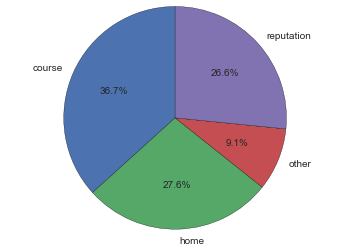

In [149]:
# 解答
import pandas as pd

student_data_math = pd.read_csv("student-mat.csv",sep=";")
student_data_math.groupby("reason").size().plot(kind="pie", autopct='%1.1f%%',startangle=90)
plt.ylabel("")
plt.axis('equal')

#### <練習問題 2>

上記と同じデータで、higher - 高い教育を受けたいかどうか(binary: yes or no)を軸にして、それぞれの数学の最終成績G3の平均値を棒グラフで表示してください。ここから何か推測できることはありますか？

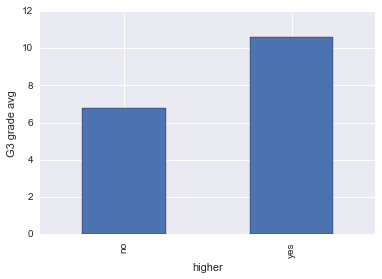

In [150]:
# 解答
student_data_math.groupby("higher")["G3"].mean().plot(kind="bar")
plt.xlabel("higher")
plt.ylabel("G3 grade avg")

# やはり意識が高い人たちの方が成績は高めであることがわかる

#### <練習問題 3>

上記と同じデータで、通学時間（trabeltime）を軸にして、それぞれの数学の最終成績G3の平均値を横棒グラフで表示してください。何か推測できることはありますか？

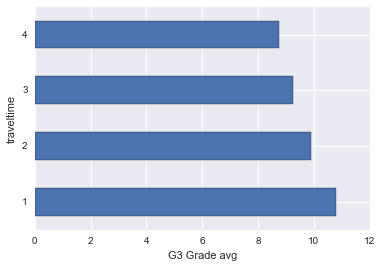

In [151]:
# 解答
student_data_math.groupby(["traveltime"])["G3"].mean().plot(kind="barh")
plt.xlabel("G3 Grade avg")

# 通学時間が長いと成績が低くなる傾向にあるが、影響していると言えるのだろうか

## 7.3 総合問題

### 7.3.1 時系列データ分析

ここでは、本章で身に付けたpandasやscipyなどを使って、時系列データについて扱っていきましょう。

（1）（データの取得と確認）下記のサイトより、dow_jones_index.zipをダウンロードし、中にあるdow_jones_index.dataを使って、データを読み込み、はじめの5行を表示してください。またデータのそれぞれのカラム情報等を見て、nullなどがあるか確認してください。　　

https://archive.ics.uci.edu/ml/machine-learning-databases/00312/dow_jones_index.zip　　

（2）（データの加工）カラムのopen、high、low、close等のデータは数字の前に$マークが付いているため、これを取り除いてください。また、日時をdate型で読み込んでいない場合は、date型に変換しましょう。

（3）カラムのcloseについて、各stockごとの要約統計量を算出してください。

（4）カラムのcloseについて、各stockの相関を算出する相関行列を出してください。また、seabornのheatmapを使って、相関行列のヒートマップを描いてみましょう。（ヒント：pandasのcorr()を使います。）

（5）(4)で算出した相関行列の中で一番相関係数が高いstockの組み合わせを抽出してください。さらに、その中でもっとも相関係数が高いペアを抜き出し、それぞれの時系列グラフを書いてください。

（6） pandasのrollingとwindow関数（窓関数）を使って、上記で使った各stockごとに、closeの過去5期（5週間）移動平均時系列データを計算してください。

（7） pandasのshift()を使って、上記で使った各stockごとに、closeの前期（1週前）との比の対数時系列データを計算してください。さらに、この中で、一番ボラティリティ（標準偏差）が一番大きいstockと小さいstockを抜き出し、その対数変化率グラフを書いてください。

In [ ]:
# 解答 (1)
# データの取得
import requests, zipfile
from io import StringIO
import io

# url 
zip_file_url = "https://archive.ics.uci.edu/ml/machine-learning-databases/00312/dow_jones_index.zip"
r = requests.get(zip_file_url, stream=True)
z = zipfile.ZipFile(io.BytesIO(r.content))
# 展開
z.extractall()

In [ ]:
# データの読み込み
dow_jones_index = pd.read_csv("dow_jones_index.data",sep=",")

In [ ]:
# データのチェック
dow_jones_index.head()

In [ ]:
# データのカラム情報
dow_jones_index.info()

In [ ]:
# 解答 (2)
# 型変更　日時型
dow_jones_index.date = pd.to_datetime(dow_jones_index.date)

# ＄マークを消す
delete_dolchar = lambda x: str(x).replace("$", "")

#対象は、open,high,low.close,next_weeks_open,next_weeks_close
# 文字型を数値型を変換する処理
dow_jones_index.open = pd.to_numeric(dow_jones_index.open.map(delete_dolchar))
dow_jones_index.high = pd.to_numeric(dow_jones_index.high.map(delete_dolchar))
dow_jones_index.low = pd.to_numeric(dow_jones_index.low.map(delete_dolchar))
dow_jones_index.close = pd.to_numeric(dow_jones_index.close.map(delete_dolchar))
dow_jones_index.next_weeks_open = pd.to_numeric(dow_jones_index.next_weeks_open.map(delete_dolchar))
dow_jones_index.next_weeks_close = pd.to_numeric(dow_jones_index.next_weeks_close.map(delete_dolchar))

In [ ]:
# check
dow_jones_index.head()

In [ ]:
# 解答(3)
# indexをセットする
dow_jones_index_stock_index = dow_jones_index.set_index(['date','stock'])

# データフレームワークの再構成
dow_jones_index_stock_index_unstack = dow_jones_index_stock_index.unstack()

# closeのみ対象
dow_close_data = dow_jones_index_stock_index_unstack['close']
#　要約統計量
dow_close_data.describe()

In [ ]:
# 解答(4)
# 相関行列
corr_data = dow_close_data.corr()
corr_data

In [ ]:
# 解答(4)
# ヒートマップ
sns.heatmap(corr_data)

In [ ]:
# 解答(5)
# 相関係数が最大となるペアの抽出（自分自身以外の29ペアの中で）

# initial value
max_corr = 0
stock_1 = ""
stock_2 = ""

for i in range(0,len(corr_data)):
    print(corr_data[i:i+1].unstack().sort_values(ascending=False)[[1]].argmax()[1]
          ,corr_data[i:i+1].unstack().sort_values(ascending=False)[[1]].argmax()[0]
          ,corr_data[i:i+1].unstack().sort_values(ascending=False)[[1]][0])
    if max_corr < corr_data[i:i+1].unstack().sort_values(ascending=False)[[1]][0]:
        max_corr = corr_data[i:i+1].unstack().sort_values(ascending=False)[[1]][0]
        stock_1 = corr_data[i:i+1].unstack().sort_values(ascending=False)[[1]].argmax()[1]
        stock_2 = corr_data[i:i+1].unstack().sort_values(ascending=False)[[1]].argmax()[0]

# output max corr pairs
print("[Max Corr]:",max_corr)
print("[stock_1]:",stock_1)
print("[stock_2]:",stock_2)

In [ ]:
# 解答(5) グラフ化
# ペアトレーディングなどに使われる。
dow_close_data_subsets =dow_close_data[[stock_1,stock_2]]
dow_close_data_subsets.plot(subplots=True,grid=True)
plt.grid(True)

In [ ]:
# 解答(6)
# 窓関数
dow_close_data.rolling(center=False,window=5).mean().head(10)

In [ ]:
# 解答(7)
# 前週比（１期ずらし）をしたい場合、shiftを使う
# loopなどを使うより、断然処理が速い
log_ratio_stock_close = np.log(dow_close_data/dow_close_data.shift(1))

max_vol_stock = log_ratio_stock_close.std().argmax()
min_vol_stock = log_ratio_stock_close.std().argmin()

# 最大と最小の標準偏差のstock
print("max volatility:",max_vol_stock)
print("min volatility:",min_vol_stock)

#　グラフ化
log_ratio_stock_close[max_vol_stock].plot()
log_ratio_stock_close[min_vol_stock].plot()
plt.ylabel("log ratio")
plt.legend()
plt.grid(True)

### 7.3.2 マーケティング分析

次は、マーケティング分析でよく扱われる購買データです。一般ユーザーとは異なる法人の購買データですが、分析する軸は基本的に同じです。

（1）下記のURLよりデータをpandasで読み込んでください（件数50万以上のデータで比較的大きいため、少し時間がかかります。）

    "http://archive.ics.uci.edu/ml/machine-learning-databases/00352/Online%20Retail.xlsx"
    
    (ヒント)pd.ExcelFileを使って、シートを.parse('Online Retail')で指定してください。
    
    また、今回の分析対象は、CustomerIDにデータが入っているレコードのみ対象にするため、そのための処理をしてください。さらに、カラムのInvoiceNoには数字の前にCがあるものはキャンセルのため、このデータを取り除いてください。他にもデータとして取り除く必要なものがあれば、適宜処理してください。以下、このデータをベースに分析していきます。

（2）このデータのカラムには、購買日時や商品名、数量、回数、購買者のIDなどがあります。ここで、購買者（CustomerID）のユニーク数、バスケット数（InvoiceNoのユニーク数）、商品の種類（StockCodeベースとDescriptionベースのユニーク数）を求めてください。

（3）このデータのカラムには、Countryがあります。このカラムを軸に、それぞれの国の購買合計金額（単位あたりの金額×数量の合計）を求め、降順にならべて、上位5つの国の結果を表示してください。

（4）上の上位5つの国について、それぞれの国の商品売り上げ（合計金額）の月別の時系列推移をグラフにしてください。ここで、グラフは分けて表示してください。

（5）上の上位5つの国について、それぞれの国における商品の売り上げTOP5の商品を抽出してください。また、それらを国ごとに円グラフにしてください。なお、商品は「Description」ベースで集計してください。

In [1]:
cd /Users/kunitaka/chapter2/

/Users/kunitaka/chapter2


In [2]:
ls

dow_jones_index.data          online_retail_data_table.csv
dow_jones_index.names


In [167]:
# 解答 (1)
#　時間がかかります
file_url = "http://archive.ics.uci.edu/ml/machine-learning-databases/00352/Online%20Retail.xlsx"
online_retail_data = pd.ExcelFile(file_url)

# シートを指定する
online_retail_data_table = online_retail_data.parse('Online Retail')
online_retail_data_table.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [168]:
# データの確認
online_retail_data_table.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
InvoiceNo      541909 non-null object
StockCode      541909 non-null object
Description    540455 non-null object
Quantity       541909 non-null int64
InvoiceDate    541909 non-null datetime64[ns]
UnitPrice      541909 non-null float64
CustomerID     406829 non-null float64
Country        541909 non-null object
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [169]:
# 解答 (1)
# c はキャンセルとあるので、取り除く処理を書く
# InvoiceNoの1文字目を抽出する処理、mapとLambda関数を使う
online_retail_data_table['cancel_flg'] = online_retail_data_table.InvoiceNo.map(lambda x:str(x)[0])
online_retail_data_table.groupby("cancel_flg").size()

cancel_flg
5    532618
A         3
C      9288
dtype: int64

In [170]:
# 解答　(1)
# Aも? 異常値として処理して、削除する
#そのため、今回は5があるものだけ分析対象
# さらに、CustomerIDがあるデータだけ対象
online_retail_data_table = online_retail_data_table[(online_retail_data_table.cancel_flg == '5') & (online_retail_data_table.CustomerID.notnull())]

In [171]:
# 解答　(2)
# unique ID
print("購買者数（ユニーク）:",len(online_retail_data_table.CustomerID.unique()))

# unique StockCode
print("商品コード数:",len(online_retail_data_table.StockCode.unique()))

# unique description
# 上より多いから、同じstockcodeで違う名前になった商品がある。
print("商品名の種類数:",len(online_retail_data_table.Description.unique()))

# unique bascket
print("バスケット数:",len(online_retail_data_table.InvoiceNo.unique()))

購買者数（ユニーク）: 4339
商品コード数: 3665
商品名の種類数: 3877
バスケット数: 18536


In [172]:
# 解答 (3)
# 売り上げ合計を求めるため、新しいカラムの追加（売り上げ＝数量×単価）
online_retail_data_table['TotalPrice'] = online_retail_data_table.Quantity * online_retail_data_table.UnitPrice

#　それぞれの国ごとに売り上げ合計金額を算出
country_data_total_p = online_retail_data_table.groupby("Country")["TotalPrice"].sum()

# 値に対して、降順にソートして、TOP5を抜き出す。
top_five_country =country_data_total_p.sort_values(ascending=False)[0:5]

# TOP5の国
print(top_five_country)

# TOP5の国のリスト
print("TOP5の国のリスト:",top_five_country.index)

Country
United Kingdom    7.308392e+06
Netherlands       2.854463e+05
EIRE              2.655459e+05
Germany           2.288671e+05
France            2.090240e+05
Name: TotalPrice, dtype: float64
TOP5の国のリスト: Index(['United Kingdom', 'Netherlands', 'EIRE', 'Germany', 'France'], dtype='object', name='Country')


In [173]:
# 解答 (4)
# TOP5だけのデータを作成。
top_five_country_data = online_retail_data_table[online_retail_data_table["Country"].isin(top_five_country.index)]

# date と国ごとの売り上げ
top_five_country_data_country_totalP =top_five_country_data.groupby(["InvoiceDate","Country"],as_index=False)["TotalPrice"].sum()

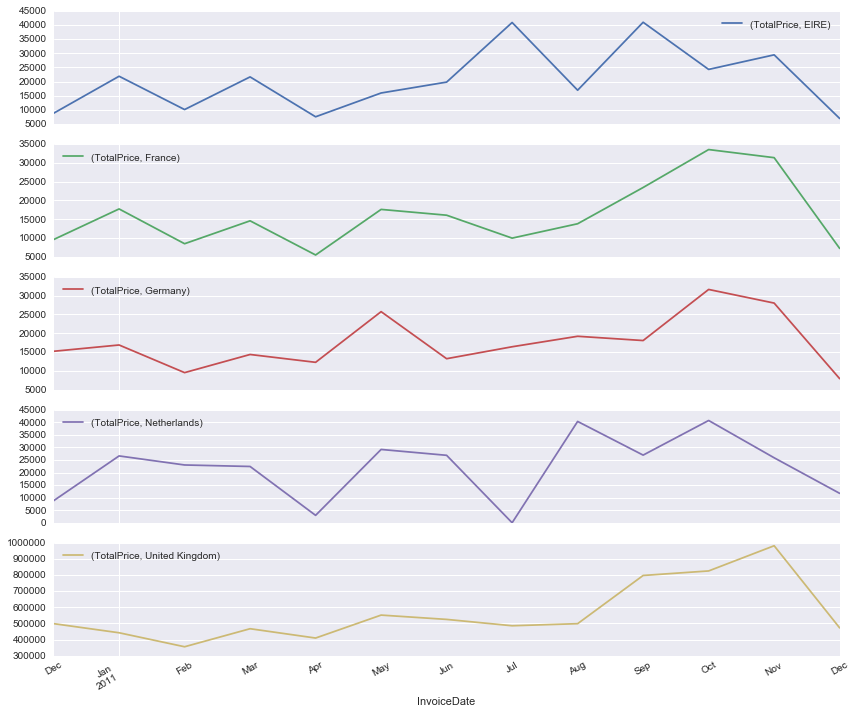

In [174]:
# 解答 (4)
# TOP 5の売り上げ月別推移

# indexの設定（日時と国）
top_five_country_data_country_totalP_index=top_five_country_data_country_totalP.set_index(['InvoiceDate','Country'])

# 再構成
top_five_country_data_country_totalP_index_uns = top_five_country_data_country_totalP_index.unstack()

# resampleで時系列のデータを月別や四半期等に変更できる。今回は、月別(M)の合計を算出。そのあと、グラフ化
top_five_country_data_country_totalP_index_uns.resample('M').sum().plot(subplots=True,figsize=(12,10))

# グラフが被らないように
plt.tight_layout()

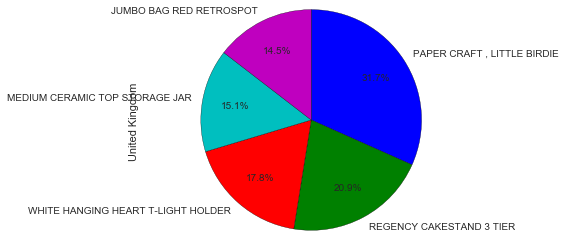

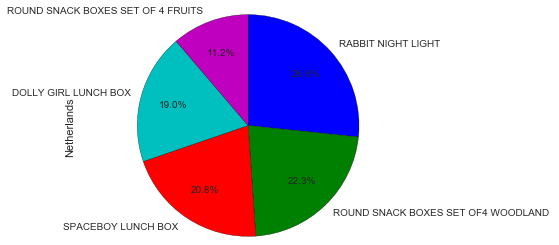

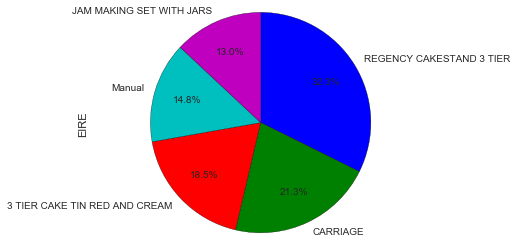

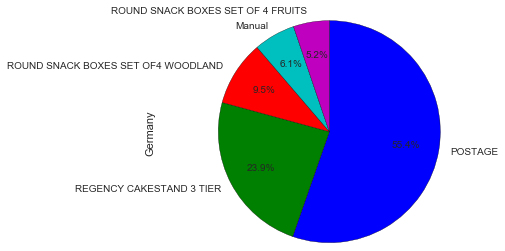

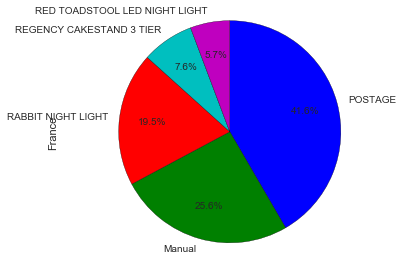

In [175]:
# 解答 (5)
for x in top_five_country.index:
    #print("Country:",x)
    country = online_retail_data_table[online_retail_data_table["Country"] == x]
    country_stock_data = country.groupby("Description")["TotalPrice"].sum()
    top_five_country_stock_data=pd.DataFrame(country_stock_data.sort_values(ascending=False)[0:5])    
    plt.figure()
    plt.pie(top_five_country_stock_data
            ,labels=top_five_country_stock_data.index
            ,counterclock=False
            ,startangle=90
            ,autopct="%.1f%%"
            ,pctdistance=0.7)
    plt.ylabel(x)
    plt.axis('equal')
    #print(top_five_country_stock_data)